# Lane Detection For Self Driving Cars 
The libraries used to do this task are 
1. OpenCV
2. NumPy
3. MatPlotLib

The first step is to read the image, converting it to greyscale and smoothening the image so as to remove any noise in the image. The next step is to apply canny  edge detection on it to identify the edges in the image. 

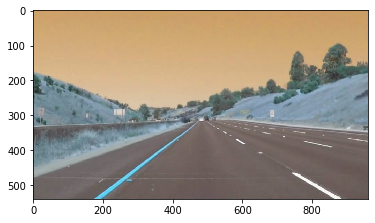

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('C:\\personal\\projects\\canny edge detection\\whiteCarLaneSwitch.png')
plt.imshow(img)

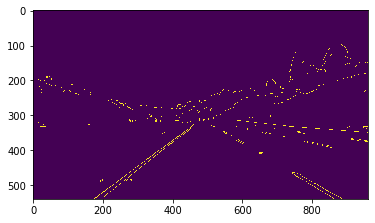

In [75]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
bilater= cv2.bilateralFilter(gray, 5, 50,50,)
canny = cv2.Canny(bilater, 150, 150)
plt.imshow(canny)

## Selecting required region
Now we use fillPoly function in open cv to create a polygon covering the section of the image that contains the roads and fill it. We use a combination of squares and triangles to get the job done. 

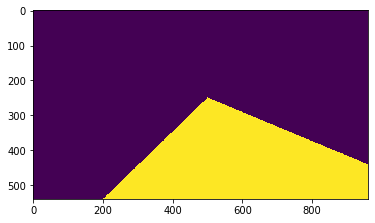

In [70]:
height   = img.shape[0]
width    = img.shape[1]
triangle = np.array([(200, height), (500,250), (1200,height)])
square   = np.array([(0,height),(465,320),(475,320),(width,height)])
mask     = np.zeros_like(img)
filled =cv2.fillPoly(mask, np.int32([triangle]), 255)
gray_filled = cv2.cvtColor(filled, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_filled)

## Retaining only required part 
We combine our polygon area and canny edge detection area to only retain edges of the road. We do so using a simple an operator on the matrices

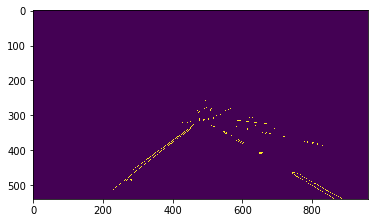

In [71]:
road_edges = canny & gray_filled
plt.imshow(road_edges)

## Drawing lines 
The HoughLines function in OpenCV is used to identify lines in the image. 

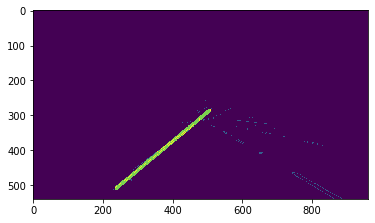

In [72]:
image = road_edges

lines = cv2.HoughLinesP(image , rho           = 3.5, theta         = np.pi/180,   
         threshold     = 320, lines         = np.array([]),
         minLineLength = 40,           
         maxLineGap    = 100)      
line_image = np.zeros_like(image)
for line in lines:
    x1, x2, y1, y2 = line.reshape(4)
    cv2.line(line_image, (x1, y1), (x2, y2),
             color=(255,0,0), thickness=10)
image_with_lines = cv2.addWeighted(line_image,0.8,image, 1, 1)
plt.imshow(image_with_lines)

## Final image
The final step is to add the detected lanes to the orignal image.This is done using addWeighted function which blends the two images. The transparency of both the images can be set using parameters so the blending is clear. 

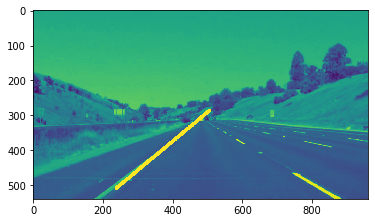

In [73]:
final = cv2.addWeighted(line_image,0.8,gray, 1, 1)
plt.imshow(final)